In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [7]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 

In [8]:
# data (as pandas dataframes) 
X = iris.data.features
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

## Preparing the Dataset for Analysis

In [ ]:
# Converting the original dataset in a pandas dataframe
z = iris.data.original
df = pd.DataFrame(z)
df['class'] = df['class'].replace({'Iris-setosa': 'Setosa', 'Iris-versicolor':'Versicolor', 'Iris-virginica': 'Virginica'}, regex=True)

# Saving the Iris dataframe into the directory
df.to_csv("/workspaces/pands-project/data.csv")

In [20]:
# Saving a description of the Iris variables into the directory as a text file
text = df.describe().T
text.index.name = 'variable'
text1 =text.round(1)
text1.to_csv("/workspaces/pands-project/iris_variables_description.txt")

## Histograms

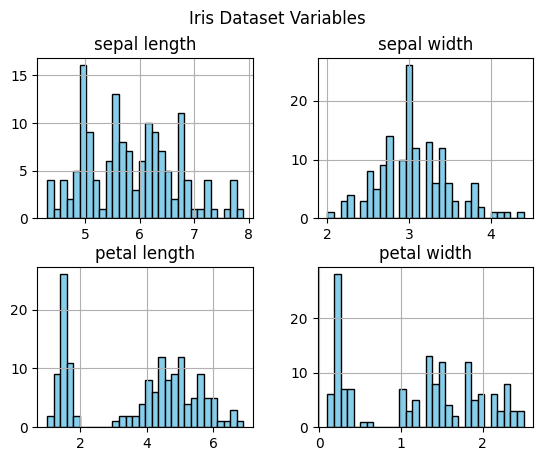

In [11]:
# Generating a histogram of the Iris dataset
df.hist(bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Iris Dataset Variables')
plt.show()

In [12]:
# Saving the histogram into the directory
plt.savefig('iris_variables.png')

<Figure size 640x480 with 0 Axes>

## Scatter Plots

Text(0.5, 1.0, 'Length/Width of Petals')

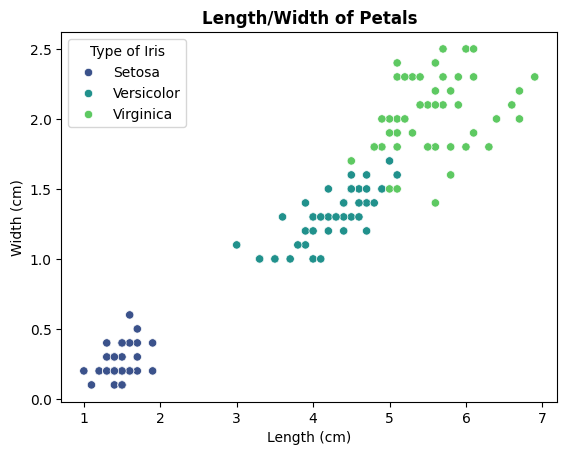

In [13]:
#create scatter plot of the petal variables
ax = sns.scatterplot(data=df, x='petal length', y='petal width', color='steelblue', hue='class', palette= 'viridis')
ax.legend(title='Type of Iris')
ax.set_xlabel('Length (cm)')
ax.set_ylabel('Width (cm)')
ax.set_title("Length/Width of Petals", fontweight="bold")

Text(0.5, 1.0, 'Length/Width of Sepals')

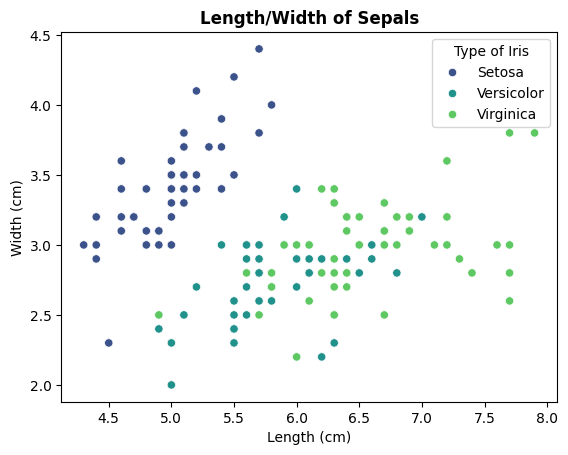

In [14]:
#create scatter plot of the sepal variables
ax = sns.scatterplot(data=df, x='sepal length', y='sepal width', color='steelblue', hue='class', palette= 'viridis')
ax.legend(title='Type of Iris')
ax.set_xlabel('Length (cm)')
ax.set_ylabel('Width (cm)')
ax.set_title("Length/Width of Sepals", fontweight="bold")

Text(0.5, 1.0, 'Length/Width of Sepals vs Petals')

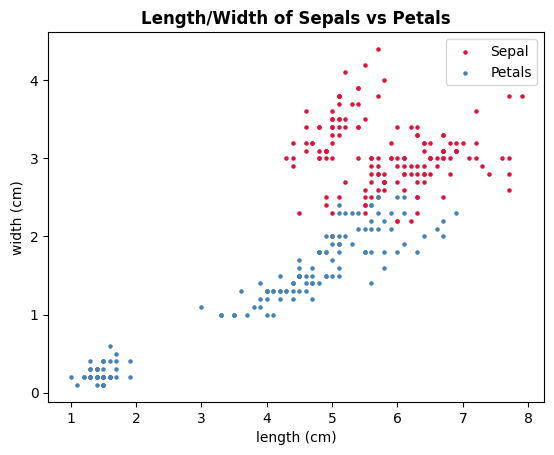

In [15]:
#create scatter plot of both pairs of variables
ax1=df.plot(kind='scatter', x='sepal length', y='sepal width', color='crimson', label='Sepal', marker = ".")
ax2=df.plot(kind='scatter', x='petal length', y='petal width', color='steelblue', label='Petals', marker = ".", ax=ax1)
ax1.set_xlabel('length (cm)')
ax1.set_ylabel('width (cm)')
ax1.set_title("Length/Width of Sepals vs Petals", fontweight="bold")

## Heatmap Correlation Analysis

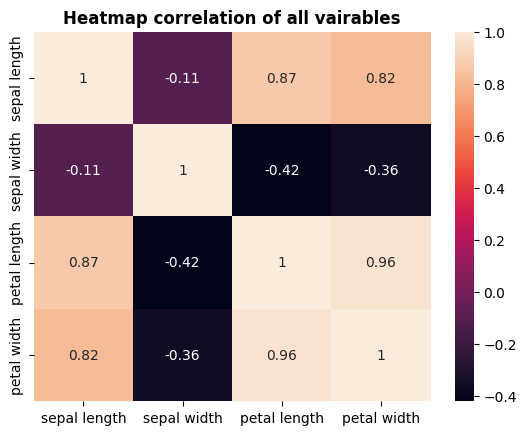

In [16]:
ax = sns.heatmap((df.select_dtypes(include=['number']).corr(method='pearson')), annot = True); 
ax.set_title("Heatmap correlation of all vairables", fontweight="bold")
plt.show()